# WK8 DATA VISUALIZATION

Name: **Sherwin Angelo S. Ortega** <br>
Course:**CPE2A**

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv(r"..\Raw\chip-dataset-cleaned.csv",
                 delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product       4854 non-null   object 
 1   Type          4854 non-null   object 
 2   Date          4854 non-null   object 
 3   Process_Size  4845 non-null   float64
 4   TDP           4854 non-null   float64
 5   Die_Size      4854 non-null   float64
 6   Transistors   4854 non-null   float64
 7   Frequency     4854 non-null   int64  
 8   Foundry       4854 non-null   object 
 9   Vendor        4854 non-null   object 
 10  FP16          536 non-null    float64
 11  FP32          1948 non-null   float64
 12  FP64          1306 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 493.1+ KB


In [72]:
df = df.drop(df.columns[[10,11,12]],axis=1)
df.head()

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.000000,122.000000,2200,Unknown,AMD
1,AMD Athlon 200GE,CPU,9/6/2018,14.0,35.0,192.000000,4800.000000,3200,Unknown,AMD
2,Intel Core i5-1145G7,CPU,9/2/2020,10.0,28.0,188.440445,1929.922279,2600,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,9/1/2013,22.0,80.0,160.000000,1400.000000,1800,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,5/3/2011,45.0,125.0,258.000000,758.000000,3700,Unknown,AMD


# Chips Manufatured

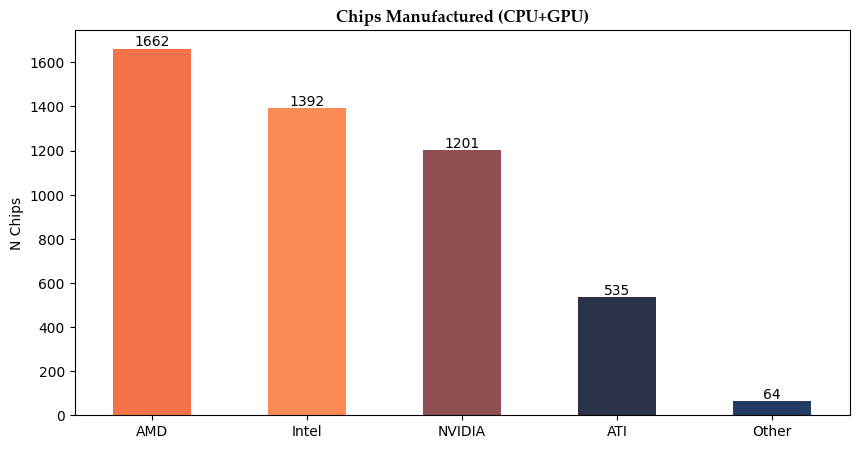

In [73]:
chip_count = df['Vendor'].value_counts()

chart = chip_count.plot(kind='bar',
                        color = ['#F6724B','#FC8A55','#8F4E51','#2B3349','#223C63'],
                        figsize=(10,5))
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('Chips Manufactured (CPU+GPU)',
          fontfamily = 'Palatino Linotype',
          fontsize=12,
          fontweight='bold')
plt.xlabel('')
chart.set_xticklabels(chip_count.index, rotation=0)
plt.ylabel('N Chips')
plt.show()

In [74]:
df_ps = df[['Type','Date','Process_Size']].where(df['Type']=='GPU').dropna()
df_ps

,Type,Date,Process_Size
2192,GPU,4/3/2011,32.0
2193,GPU,6/25/2002,150.0
2194,GPU,2/23/2019,14.0
2195,GPU,3/2/2008,130.0
2196,GPU,9/30/2008,55.0
...,...,...,...
4849,GPU,2/22/2011,40.0
4850,GPU,6/1/2005,90.0
4851,GPU,3/3/2010,40.0
4852,GPU,3/6/2003,150.0


In [75]:
df_ps['Date'] = pd.to_datetime(df_ps['Date'])
df_ps['Year'] = df_ps['Date'].dt.year
df_ps 

,Type,Date,Process_Size,Year
2192,GPU,2011-04-03,32.0,2011.0
2193,GPU,2002-06-25,150.0,2002.0
2194,GPU,2019-02-23,14.0,2019.0
2195,GPU,2008-03-02,130.0,2008.0
2196,GPU,2008-09-30,55.0,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,40.0,2011.0
4850,GPU,2005-06-01,90.0,2005.0
4851,GPU,2010-03-03,40.0,2010.0
4852,GPU,2003-03-06,150.0,2003.0


In [76]:
df_ps = df_ps.groupby('Year')['Process_Size'].mean().reset_index()
df_ps

,Year,Process_Size
0,2000.0,189.642857
1,2001.0,165.000000
2,2002.0,153.913043
3,2003.0,140.982143
4,2004.0,121.384615
5,2005.0,112.315789
6,2006.0,93.178295
7,2007.0,80.031646
8,2008.0,63.439306
9,2009.0,52.740385


GPU & CPU  Manufactured

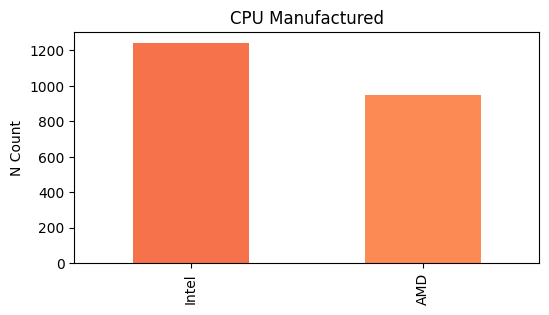

In [77]:
cpu_count = df[df['Type'] == 'CPU']['Vendor'].value_counts()

chart = cpu_count.plot(kind='bar',
                        color = ['#F6724B','#FC8A55'],
                        figsize=(6,3))
plt.title('CPU Manufactured')
plt.ylabel('N Count')
plt.xlabel('')
plt.show()

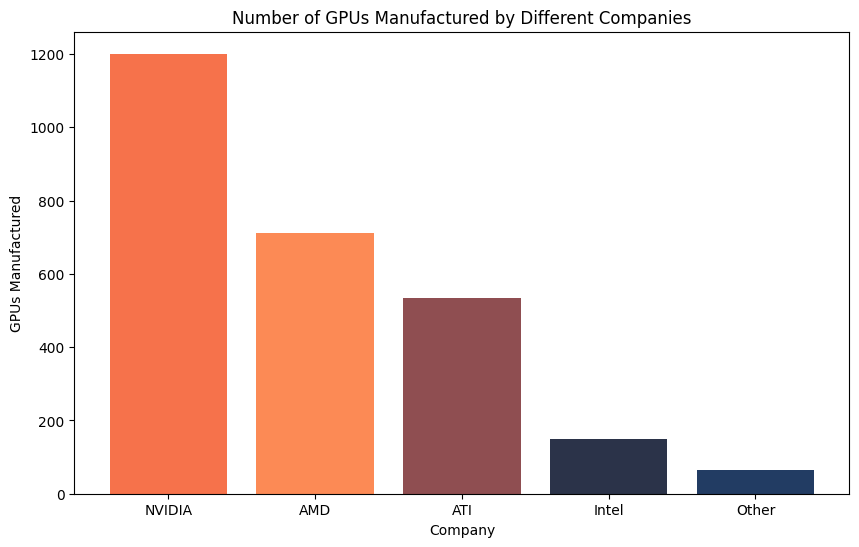

In [78]:
df_gpu = df[df['Type'] == 'GPU']
gpu_counts = df_gpu['Vendor'].value_counts().reset_index()
gpu_counts.columns = ['Vendor', 'Count']


plt.figure(figsize=(10, 6))
plt.bar(gpu_counts['Vendor'], gpu_counts['Count'], color=['#F6724B','#FC8A55','#8F4E51','#2B3349','#223C63'])

plt.title('Number of GPUs Manufactured by Different Companies')
plt.xlabel('Company')
plt.ylabel('GPUs Manufactured')

plt.show()

GPU & CPU Process Size Trend

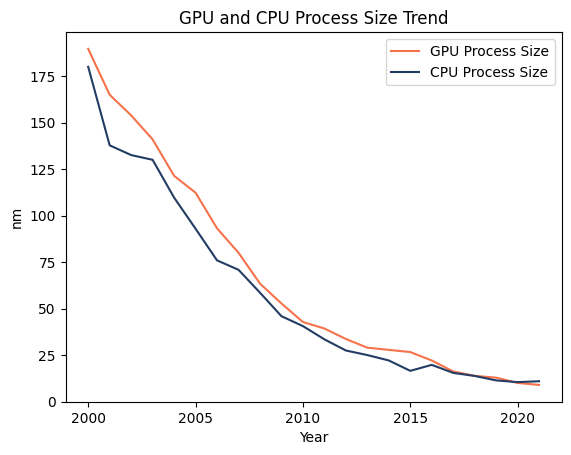

In [79]:
df_cpu_ps = df[['Type', 'Date', 'Process_Size']].where(df['Type'] == 'CPU').dropna()
df_cpu_ps['Date'] = pd.to_datetime(df_cpu_ps['Date'])
df_cpu_ps['Year'] = df_cpu_ps['Date'].dt.year
df_cpu_ps = df_cpu_ps.groupby('Year')['Process_Size'].mean().reset_index()
df_cpu_ps.rename(columns={'Process_Size': 'CPU_Process_Size'}, inplace=True)

plt.plot(df_ps['Year'], df_ps['Process_Size'], color='#F6724B', label='GPU Process Size')
plt.plot(df_cpu_ps['Year'], df_cpu_ps['CPU_Process_Size'], color='#223C63', label='CPU Process Size')

plt.title('GPU and CPU Process Size Trend')
plt.ylabel('nm')
plt.xlabel('Year')
plt.legend()
plt.show()

GPU & CPU Die Size Trend

In [80]:
#GPU
df_ds = df_w[['Type', 'Date', 'Die_Size']].where(df_w['Type'] == 'GPU').dropna()
df_ds['Date'] = pd.to_datetime(df_ds['Date'])
df_ds['Year'] = df_ds['Date'].dt.year
df_ds = df_ds.groupby('Year')['Die_Size'].mean().reset_index()

#CPU
df_cpu_ds = df_w[['Type', 'Date', 'Die_Size']].where(df_w['Type'] == 'CPU').dropna()
df_cpu_ds['Date'] = pd.to_datetime(df_cpu_ds['Date'])
df_cpu_ds['Year'] = df_cpu_ds['Date'].dt.year
df_cpu_ds = df_cpu_ds.groupby('Year')['Die_Size'].mean().reset_index()

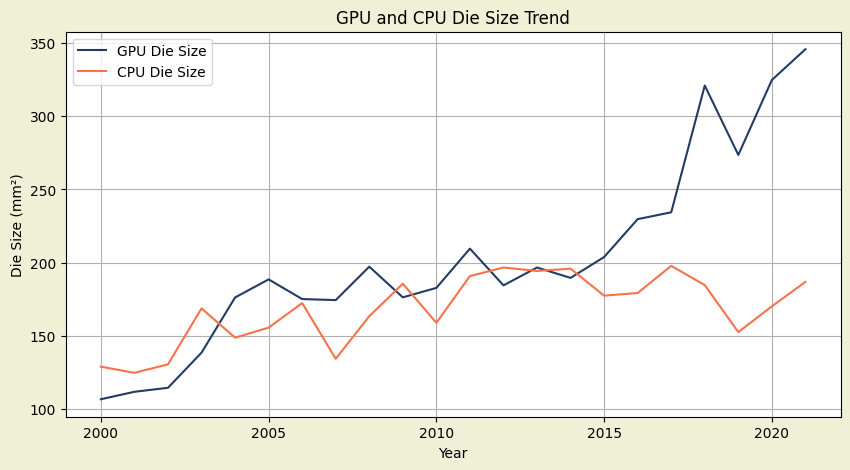

In [81]:
df_combined = pd.merge(df_ds, df_cpu_ds, on='Year', how='inner', suffixes=('_GPU', '_CPU'))

plt.figure(facecolor='#F0F0D7', figsize=(10, 5))
plt.plot(df_combined['Year'], df_combined['Die_Size_GPU'], color='#223C63', marker='', linestyle='-', label='GPU Die Size')
plt.plot(df_combined['Year'], df_combined['Die_Size_CPU'], color='#F6724B', marker='', linestyle='-', label='CPU Die Size')
plt.title('GPU and CPU Die Size Trend')
plt.xlabel('Year')
plt.ylabel('Die Size (mm²)')
plt.legend()
plt.grid(True)
plt.show()

GPU & CPU Transistor Count Trend

In [82]:
#GPU
df_t = df_w[['Type', 'Date', 'Transistors']].where(df_w['Type'] == 'GPU').dropna()
df_t['Date'] = pd.to_datetime(df_t['Date'])
df_t['Year'] = df_t['Date'].dt.year
df_t = df_t.groupby('Year')['Transistors'].mean().reset_index()

#CPU
df_cpu_t = df_w[['Type', 'Date', 'Transistors']].where(df_w['Type'] == 'CPU').dropna()
df_cpu_t['Date'] = pd.to_datetime(df_cpu_t['Date'])
df_cpu_t['Year'] = df_cpu_t['Date'].dt.year
df_cpu_t = df_cpu_t.groupby('Year')['Transistors'].mean().reset_index()

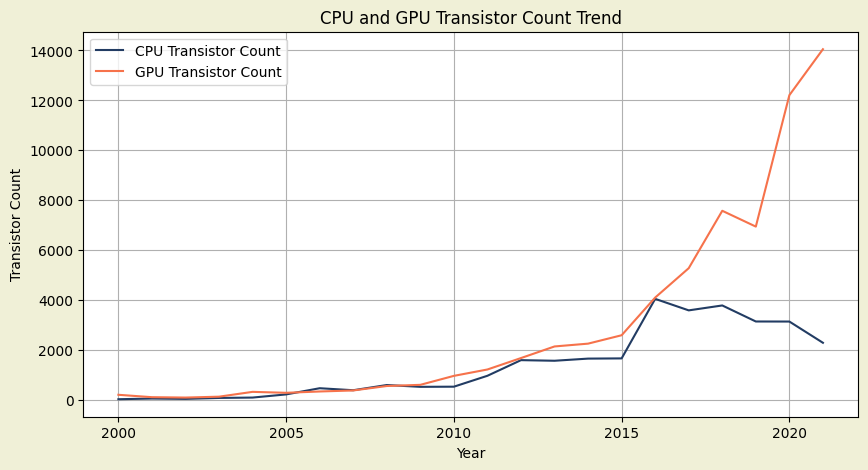

In [83]:
df_combined = pd.merge(df_cpu_t, df_t, on='Year', how='inner', suffixes=('_CPU', '_GPU'))

plt.figure(facecolor='#F0F0D7', figsize=(10, 5))
plt.plot(df_combined['Year'], df_combined['Transistors_CPU'], color='#223C63', marker='', linestyle='-', label='CPU Transistor Count')
plt.plot(df_combined['Year'], df_combined['Transistors_GPU'], color='#F6724B', marker='', linestyle='-', label='GPU Transistor Count')
plt.title('CPU and GPU Transistor Count Trend')
plt.xlabel('Year')
plt.ylabel('Transistor Count')
plt.legend()
plt.grid(True)
plt.show()

Average Frequency for Every Manufacturer

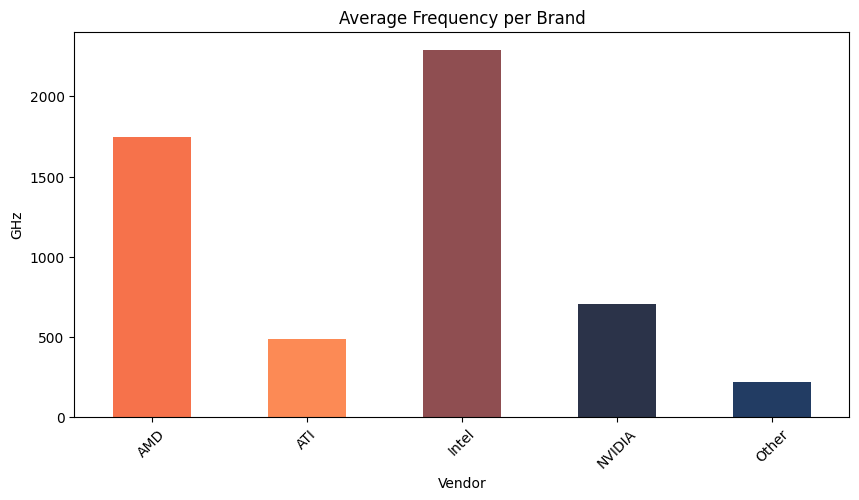

In [84]:
plt.figure(figsize=(10,5))
df.groupby('Vendor')['Frequency'].mean().plot(kind='bar', color=['#F6724B','#FC8A55','#8F4E51','#2B3349','#223C63'])
plt.title("Average Frequency per Brand")
plt.ylabel("GHz")
plt.xticks(rotation=45)
plt.show()